# Fashion MNIST Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
def plot_img(index):
  plt.figure(figsize=(20,5))
  plt.imshow(x_train[index],cmap = plt.get_cmap('gray'))
  plt.title(classes[y_train[index]])

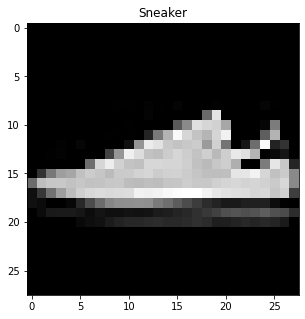

In [16]:
plot_img(6)

In [17]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [18]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype='float32'
)

In [24]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'] 
)

model.fit(x_train_scaled,y_train_categorical,epochs=50,batch_size=50)

Epoch 1/50
1200/1200 [==============================] - 6s 2ms/step - loss: 0.5076 - accuracy: 0.8215
Epoch 2/50
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8649
Epoch 3/50
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8785
Epoch 4/50
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8849
Epoch 5/50
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2964 - accuracy: 0.8904
Epoch 6/50
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2810 - accuracy: 0.8960
Epoch 7/50
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2680 - accuracy: 0.9000
Epoch 8/50
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2615 - accuracy: 0.9033
Epoch 9/50
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2505 - accuracy: 0.9068
Epoch 10/50
1200/1200 [==============================] - 3s 2ms/step - loss: 0.239

In [26]:
model.predict(x_test_scaled)[0]

array([4.1674325e-10, 5.9504952e-14, 6.7537315e-02, 9.8251562e-08,
       1.6744288e-02, 5.2882475e-01, 5.3898082e-04, 9.9999452e-01,
       8.2072099e-11, 1.0000000e+00], dtype=float32)

In [28]:
y_predicted = model.predict(x_test_scaled)
y_predicted = [np.argmax(i) for i in y_predicted]
y_predicted[:5]

[9, 2, 1, 1, 6]

In [33]:
def plot_actual(index):
  #plt.figure(figsize=(20,5))
  plt.imshow(x_test[index],cmap = plt.get_cmap('gray'))
  plt.title(classes[y_test[index]])

def plot_predicted(index):
  plt.imshow(x_test[index],cmap = plt.get_cmap('gray'))
  plt.title(classes[y_predicted[index]])

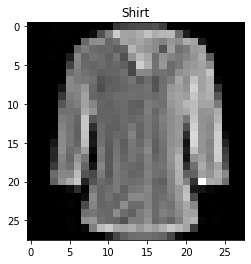

In [35]:
plot_predicted(4)

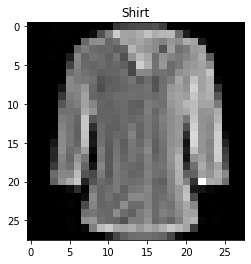

In [36]:
plot_actual(4)

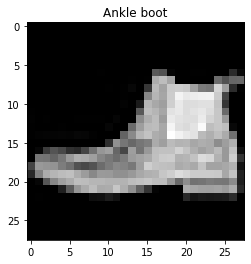

In [38]:
plot_predicted(784)

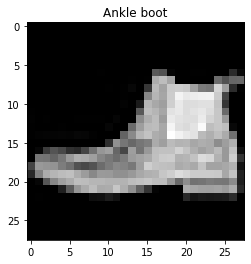

In [39]:
plot_actual(784)

In [40]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.5179 - accuracy: 0.8887


[0.5178722143173218, 0.888700008392334]